In [462]:
import pandas as pd
from pymatgen.core import Composition


h = pd.read_csv("data/train_h.csv")
h = h.drop(columns=['sid', 'bulk_id', 'miller_index', 'traj_id', 'slab_sid', 'ads_symbols', 'nads'])
no_ads = pd.read_csv("data/train_no_ads.csv")
no_ads = no_ads.drop(columns=['sid', 'bulk_id', 'miller_index', 'traj_id', 'slab_sid', 'ads_symbols', 'nads'])

pd.options.mode.copy_on_write = True

h['composition'] = h['bulk_symbols'].apply(lambda x: Composition(x))

print(h['y_relaxed'].describe())

count    1605.000000
mean     -483.793100
std       227.043941
min     -1747.629416
25%      -614.042535
50%      -454.077844
75%      -317.534410
max       -59.024696
Name: y_relaxed, dtype: float64


In [463]:
h = h.sample(200)

In [464]:
from mp_api.client import MPRester
import os

key = os.getenv("API_KEY")

def get_structure_from_composition(composition, api_key):
    """Fetch structure from Materials Project given a composition"""
    try:
        with MPRester(api_key=api_key) as mpr:
            # Search for materials with this composition
            docs = mpr.materials.summary.search(
                formula=composition.reduced_formula,
                fields=[
                    "material_id", 
                    "structure", 
                    "energy_above_hull",
                ]
            )
            
            if docs:
                # Sort by energy_above_hull and get the most stable structure
                docs_sorted = sorted(docs, key=lambda x: x.energy_above_hull)
                return docs_sorted[0].structure
            else:
                return None
    except Exception as e:
        print(f"Error fetching structure for {composition}: {e}")
        return None

# Apply to your dataframe
if key:
    h['structure'] = h['composition'].apply(
        lambda comp: get_structure_from_composition(comp, key)
    )
    print(f"Fetched structures for {h['structure'].notna().sum()} compositions")

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/14 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/10 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/19 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/321 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/10 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/15 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/13 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Fetched structures for 191 compositions


In [465]:
from mp_api.client import MPRester
import os
import time

# Load API key
key = os.getenv("API_KEY")

def get_mp_data(composition, api_key, max_retries=3):
    """
    Fetch multiple properties from Materials Project given a composition.
    Includes retry logic for rate limiting.
    """
    for attempt in range(max_retries):
        try:
            with MPRester(api_key=api_key) as mpr:
                docs = mpr.materials.summary.search(
                    formula=composition.reduced_formula,
                    fields=[
                        "material_id",
                        "structure",
                        "formula_pretty",
                        "symmetry",
                        "volume",
                        "density",
                        "density_atomic",
                        "energy_per_atom",
                        "formation_energy_per_atom",
                        "energy_above_hull",
                        "band_gap",
                        "is_stable",
                        "is_metal",
                        "efermi",
                        "total_magnetization",
                        "num_magnetic_sites",
                        "nsites",
                        "nelements",
                        "elements",
                        "nsites",
                        "composition",
                        "composition_reduced",
                        "theoretical",
                        "database_IDs",
                    ]
                )
                
                if docs:
                    # Sort by energy_above_hull to get most stable structure
                    docs_sorted = sorted(docs, key=lambda x: x.energy_above_hull)
                    most_stable = docs_sorted[0]
                    
                    # Extract symmetry info if available
                    spacegroup_num = None
                    crystal_system = None
                    if hasattr(most_stable, 'symmetry') and most_stable.symmetry:
                        spacegroup_num = most_stable.symmetry.number if hasattr(most_stable.symmetry, 'number') else None
                        crystal_system = most_stable.symmetry.crystal_system if hasattr(most_stable.symmetry, 'crystal_system') else None
                    
                    # Return a dictionary with all the properties
                    return {
                        'mp_material_id': most_stable.material_id,
                        'mp_volume': most_stable.volume,
                        'mp_density': most_stable.density,
                        'mp_density_atomic': most_stable.density_atomic,
                        'mp_energy_per_atom': most_stable.energy_per_atom,
                        'mp_formation_energy_per_atom': most_stable.formation_energy_per_atom,
                        'mp_band_gap': most_stable.band_gap,
                        'mp_efermi': most_stable.efermi if hasattr(most_stable, 'efermi') else None,
                        # 'mp_nelements': most_stable.nelements if hasattr(most_stable, 'nelements') else None,
                        'mp_nsites': most_stable.nsites if hasattr(most_stable, 'nsites') else None,
                        # 'mp_theoretical': most_stable.theoretical if hasattr(most_stable, 'theoretical') else None,
                        'mp_spacegroup_number': spacegroup_num,
                        # 'mp_crystal_system': crystal_system,
                    }
                else:
                    print(f"No results found for {composition.reduced_formula}")
                    return {}
                    
        except Exception as e:
            error_msg = str(e).lower()
            if 'rate limit' in error_msg or '429' in error_msg:
                wait_time = (attempt + 1) * 2  # Exponential backoff: 2s, 4s, 6s
                print(f"Rate limited for {composition.reduced_formula}. Waiting {wait_time}s... (attempt {attempt+1}/{max_retries})")
                time.sleep(wait_time)
            else:
                print(f"Error fetching data for {composition.reduced_formula}: {e}")
                return None
    
    print(f"Failed to fetch data for {composition.reduced_formula} after {max_retries} attempts")
    return None

def fetch_mp_features(df, composition_col='composition', api_key=None, sleep_time=0.5):
    """
    Fetch Materials Project features for all compositions in a dataframe.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Dataframe containing compositions
    composition_col : str
        Name of the column containing pymatgen Composition objects
    api_key : str
        Materials Project API key (if None, reads from environment)
    sleep_time : float
        Time to wait between API calls to avoid rate limiting (seconds)
    
    Returns:
    --------
    pandas.DataFrame
        Original dataframe with MP features added
    """
    if api_key is None:
        api_key = os.getenv("API_KEY")
    
    if not api_key:
        print("Error: No API key found. Set API_KEY environment variable.")
        return df
    
    print(f"Fetching Materials Project data for {len(df)} compositions...")
    print(f"This may take a while (~{len(df) * sleep_time / 60:.1f} minutes with rate limiting)")
    
    # Get all MP data as a list of dictionaries
    mp_data_list = []
    
    for idx, comp in enumerate(df[composition_col]):
        if idx % 10 == 0:
            print(f"Processing {idx}/{len(df)}...")
        
        mp_data = get_mp_data(comp, api_key)
        mp_data_list.append(mp_data)
        
        # Sleep to avoid rate limiting
        if sleep_time > 0 and idx < len(df) - 1:
            time.sleep(sleep_time)
    
    # Convert list of dicts to DataFrame
    mp_df = pd.DataFrame(mp_data_list, index=df.index)
    
    # Report success rate
    success_count = mp_df['mp_material_id'].notna().sum()
    print(f"\nSuccessfully fetched data for {success_count}/{len(df)} compositions ({success_count/len(df)*100:.1f}%)")
    
    # Concatenate with original dataframe (aligned by index)
    df_with_mp = pd.concat([df, mp_df], axis=1)
    
    # Print summary of numeric features
    numeric_cols = [col for col in mp_df.columns if mp_df[col].dtype in ['float64', 'int64', 'bool']]
    print(f"\nNumeric MP features added: {len(numeric_cols)}")
    print(f"Columns: {numeric_cols}")
    
    return df_with_mp

h_with_mp = fetch_mp_features(h, composition_col='composition', sleep_time=0.5)
    
# Check for missing data
print("\nMissing data summary:")
mp_cols = [col for col in h_with_mp.columns if col.startswith('mp_')]
print(h_with_mp[mp_cols].isnull().sum())

# Save to file (optional)
# h_with_mp.to_pickle('data_with_mp_features.pkl')

Fetching Materials Project data for 200 compositions...
This may take a while (~1.7 minutes with rate limiting)
Processing 0/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Processing 10/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for IrPtO4


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 20/200...


Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 30/200...


Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for FePdO4


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/14 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/21 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for GaPdO4
Processing 40/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Processing 50/200...


Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Processing 60/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for BiIrO4


Retrieving SummaryDoc documents:   0%|          | 0/10 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 70/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/19 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/321 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Processing 80/200...


Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/10 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 90/200...


Retrieving SummaryDoc documents:   0%|          | 0/15 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/12 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 100/200...


Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Processing 110/200...


Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for CoAuO4


Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Processing 120/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 130/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Processing 140/200...


Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/6 [00:00<?, ?it/s]

Processing 150/200...


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/8 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Processing 160/200...


Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Processing 170/200...


Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for IrPbO4


Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for InPdO4


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for GeBiO4


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Processing 180/200...


Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/9 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/13 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Processing 190/200...


Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

No results found for TlTeO4


Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


Successfully fetched data for 191/200 compositions (95.5%)

Numeric MP features added: 9
Columns: ['mp_volume', 'mp_density', 'mp_density_atomic', 'mp_energy_per_atom', 'mp_formation_energy_per_atom', 'mp_band_gap', 'mp_efermi', 'mp_nsites', 'mp_spacegroup_number']

Missing data summary:
mp_material_id                  9
mp_volume                       9
mp_density                      9
mp_density_atomic               9
mp_energy_per_atom              9
mp_formation_energy_per_atom    9
mp_band_gap                     9
mp_efermi                       9
mp_nsites                       9
mp_spacegroup_number            9
dtype: int64


In [527]:
h_with_mp.head()

,y_relaxed,bulk_symbols,composition,structure,mp_material_id,mp_volume,mp_density,mp_density_atomic,mp_energy_per_atom,mp_formation_energy_per_atom,mp_band_gap,mp_efermi,mp_nsites,mp_spacegroup_number
273,-168.522563,Fe2Pt2O4,"(Fe, Pt, O)","[[2.447939 2.187841 1.3171545] Fe, [2.446675...",mp-867719,95.847648,9.803322,11.980956,-7.282828,-1.173559,0.0000,4.159510,8.0,166.0
1391,-528.459090,K12Bi12O36,"(K, Bi, O)","[[7.54990346 7.54990346 7.54990346] K, [2.5166...",mp-29799,1020.094499,5.783550,17.001575,-5.545642,-1.572585,0.4914,1.195174,60.0,201.0
927,-218.368797,Sr4Sn4O12,"(Sr, Sn, O)","[[2.71242321 2.82890507 6.07620985] Sr, [5.581...",mp-2879,266.217500,6.345517,13.310875,-6.746535,-2.637359,1.7365,4.026101,20.0,62.0
1409,-394.104008,Al4Tl4O12,"(Al, Tl, O)","[[0. 2.680234 0. ] Al, [0. 2...",mp-768539,214.282802,8.659458,10.714140,-6.380361,-2.188175,1.2082,6.176264,20.0,62.0
78,-335.803495,K8Ag8O8,"(K, Ag, O)","[[3.36541154 2.23610856 6.37899286] K, [4.2676...",mp-3074,264.065110,4.099159,22.005426,-4.001341,-1.027251,1.4858,0.025970,12.0,139.0


In [532]:
h_subset = h_with_mp.sample(50)

In [533]:
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.composition import Stoichiometry
from matminer.featurizers.composition import ValenceOrbital
from matminer.featurizers.composition import TMetalFraction
from matminer.featurizers.composition import BandCenter
from matminer.featurizers.composition import AtomicOrbitals, ElectronAffinity, BandCenter

from matminer.featurizers.site import CoordinationNumber, VoronoiFingerprint
from matminer.featurizers.structure import SiteStatsFingerprint
from matminer.featurizers.structure import DensityFeatures, BondFractions, StructureComposition

from matminer.featurizers.conversions import CompositionToOxidComposition

In [543]:
import warnings

from pymatgen.core import Structure

# suppress annoying warnings
warnings.filterwarnings('ignore', message='.*impute_nan.*')

h_featurized = CompositionToOxidComposition().featurize_dataframe(h_subset, col_id='composition', ignore_errors=True)

magpie_features = [
    "NUnfilled",
    "MeltingT",
    "ElectronAffinity",
    "Electronegativity",
]

deml_features = [
    "col_num",
    "atom_radius",
    "heat_fusion",
    "boiling_point",
    "melting_point",
    "first_ioniz",
    "GGAU_Etot",
    "mus_fere",
    "FERE correction",
]

h_featurized = ElementProperty("magpie", features=magpie_features, stats=["mean"], impute_nan=False).featurize_dataframe(h_featurized, col_id="composition", ignore_errors=True)
# h_featurized = ElementProperty.from_preset("deml").featurize_dataframe(h_featurized, col_id="composition", ignore_errors=True)

h_featurized = ElementProperty("deml", deml_features, stats=["mean"], impute_nan=False).featurize_dataframe(h_featurized, col_id='composition', ignore_errors=False)
# h_featurized = ElementProperty.from_preset("matminer").featurize_dataframe(h_featurized, col_id="composition", ignore_errors=True)

h_featurized = DensityFeatures().featurize_dataframe(h_featurized, col_id='structure', ignore_errors=True)

# h_featurized = ElectronAffinity().featurize_dataframe(h_featurized, col_id='composition_oxid', ignore_errors=True)
h_featurized = BandCenter().featurize_dataframe(h_featurized, col_id='composition', ignore_errors=True)

h_featurized = SiteStatsFingerprint(VoronoiFingerprint(), stats=['mean']).featurize_dataframe(h_featurized, col_id='structure', ignore_errors=True)
h_featurized = SiteStatsFingerprint(CoordinationNumber(), stats=['mean']).featurize_dataframe(h_featurized, col_id='structure', ignore_errors=True)
# h_featurized = BondFractions().fit(X=list(h_featurized['structure'])).featurize_dataframe(h_featurized, col_id='structure', ignore_errors=True)

CompositionToOxidComposition:   0%|          | 0/50 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/50 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/50 [00:00<?, ?it/s]

DensityFeatures:   0%|          | 0/50 [00:00<?, ?it/s]

BandCenter:   0%|          | 0/50 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/50 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/50 [00:00<?, ?it/s]

In [544]:
h_featurized.head()

,y_relaxed,bulk_symbols,composition,structure,mp_material_id,mp_volume,mp_density,mp_density_atomic,mp_energy_per_atom,mp_formation_energy_per_atom,...,mean Voro_vol_maximum,mean Voro_area_mean,mean Voro_area_std_dev,mean Voro_area_minimum,mean Voro_area_maximum,mean Voro_dist_mean,mean Voro_dist_std_dev,mean Voro_dist_minimum,mean Voro_dist_maximum,mean CN_VoronoiNN
1554,-219.567972,Al1Bi1O3,"(Al, Bi, O)",[[ 9.14576727e+00 -8.79857592e-17 3.19390517e...,mp-551918,113.675214,8.296037,11.367521,-6.996409,-2.500511,...,1.507472,2.086826,1.282886,0.163741,4.135868,2.671058,0.459624,1.989649,3.558869,14.000000
49,-508.095096,Mn1Sb4O12,"(Mn, Sb, O)","[[3.51937074 1.80196527 1.24186143] Mn, [6.118...",mp-757065,210.292745,5.795670,12.370161,-6.732293,-1.729143,...,1.553309,2.246732,1.329688,0.332696,4.645540,2.748604,0.516214,1.934986,3.721227,14.235294
715,-691.323479,Sr5Bi3O12,"(Sr, Bi, O)","[[0. 0. 0.] Sr, [0.09322627 2.73587724 6.43007...",mp-33444,311.080298,6.710017,15.554015,-6.356893,-2.381504,...,2.298081,2.418709,1.843610,0.302912,5.596641,3.019067,0.489920,2.215003,3.783772,14.800000
1571,-504.523051,Cd2Ge4O10,"(Cd, Ge, O)","[[ 1.9055254 -0.16914334 4.87994439] Cd, [0....",mp-7762,180.994984,6.196239,11.312186,-6.298364,-1.930130,...,1.713626,2.123940,1.500994,0.535652,5.520675,2.733473,0.483050,1.836862,3.471499,14.750000
1081,-763.850971,Sr1Mo1O3,"(Sr, Mo, O)","[[ 8.63681601 -6.1475789 -0.11453516] Sr, [ 2...",mp-1542758,135.042598,5.694669,13.504260,-8.073331,-2.596939,...,1.732943,2.149819,1.476273,0.321969,4.439199,2.873989,0.457653,2.132456,3.635362,14.800000


In [546]:
h_feat_dropped = h_featurized.dropna(subset=h_featurized.columns).reset_index(drop=True)
h_feat_dropped = h_feat_dropped.drop(columns=['density', 'packing fraction'])
print(h_feat_dropped.isna().sum())
print(h_feat_dropped.shape)

y_relaxed                 0
bulk_symbols              0
composition               0
structure                 0
mp_material_id            0
                         ..
mean Voro_dist_mean       0
mean Voro_dist_std_dev    0
mean Voro_dist_minimum    0
mean Voro_dist_maximum    0
mean CN_VoronoiNN         0
Length: 61, dtype: int64
(41, 61)


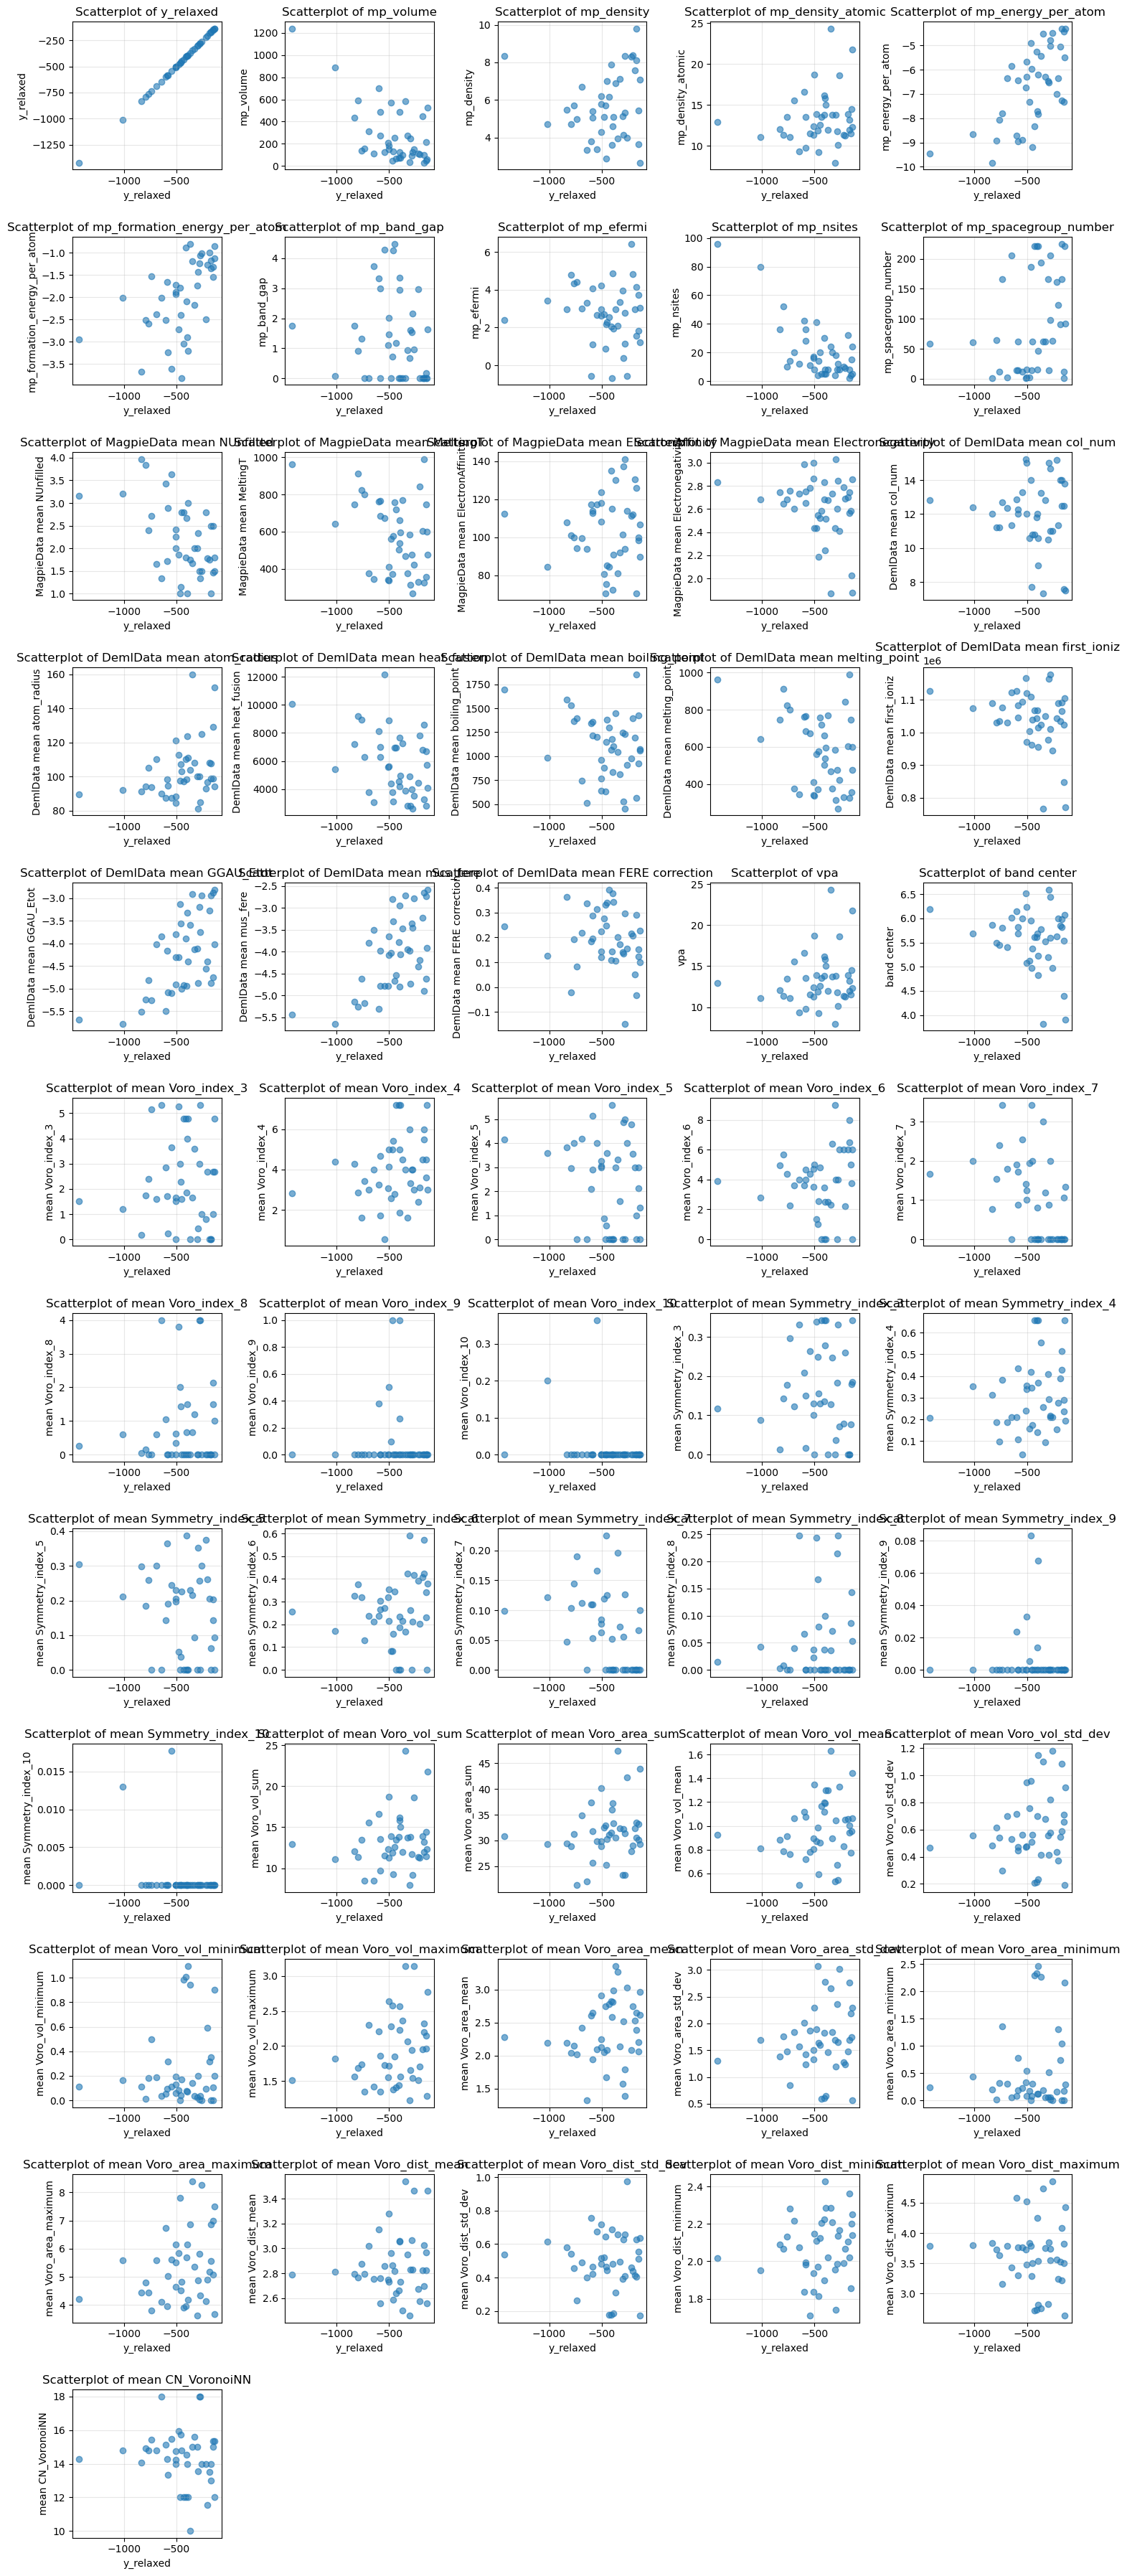

In [547]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get MP feature columns, excluding non-numeric ones
feature_cols = [c for c in h_feat_dropped.columns if pd.api.types.is_numeric_dtype(h_feat_dropped[c])]

if len(feature_cols) == 0:
    print("No numeric MP features found!")
else:
    n_features = len(feature_cols)
    n_cols = 5
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
    
    # Handle case where there's only one row
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    axes = axes.flatten()  # Flatten to 1D array for easy indexing
    
    for idx, col in enumerate(feature_cols):
        try:
            # Filter out NaN values for cleaner plots
            mask = h_feat_dropped[col].notna() & h_feat_dropped['y_relaxed'].notna()
            
            axes[idx].scatter(
                h_feat_dropped.loc[mask, 'y_relaxed'], 
                h_feat_dropped.loc[mask, col], 
                alpha=0.6
            )
            axes[idx].set_xlabel('y_relaxed')
            axes[idx].set_ylabel(col)
            axes[idx].set_title(f'Scatterplot of {col}')
            axes[idx].grid(True, alpha=0.3)
        except Exception as e:
            print(f"Error plotting {col}: {e}")
            axes[idx].text(0.5, 0.5, f'Error: {col}', 
                          ha='center', va='center', transform=axes[idx].transAxes)
    
    # Hide empty subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [477]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

h_X = h_feat_dropped.drop(columns=['y_relaxed', 'bulk_symbols', 'composition', 'structure', 'composition_oxid', 'mp_material_id'])
h_y = h_feat_dropped['y_relaxed']

h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(
    h_X, 
    h_y, 
    test_size=0.4, 
    random_state=1065)

h_scaler = StandardScaler()
h_X_train_scaled = h_scaler.fit_transform(h_X_train)
h_X_test_scaled = h_scaler.transform(h_X_test)

--- h dataset ---
linear regression training R^2 (CV): 0.115
linear regression test R^2: 0.330


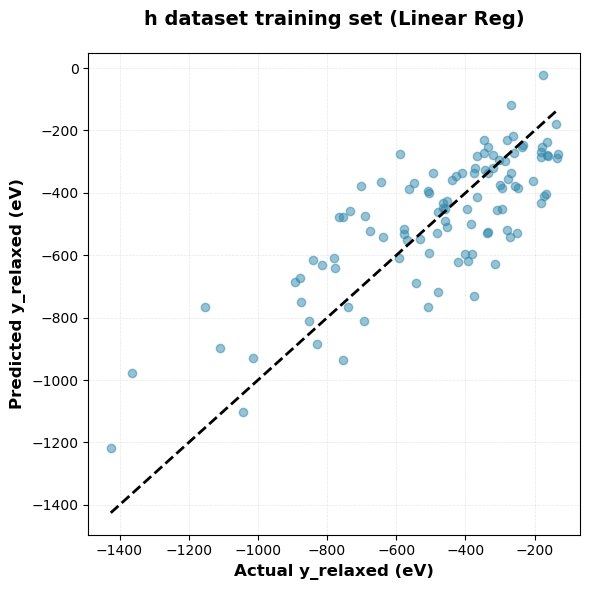

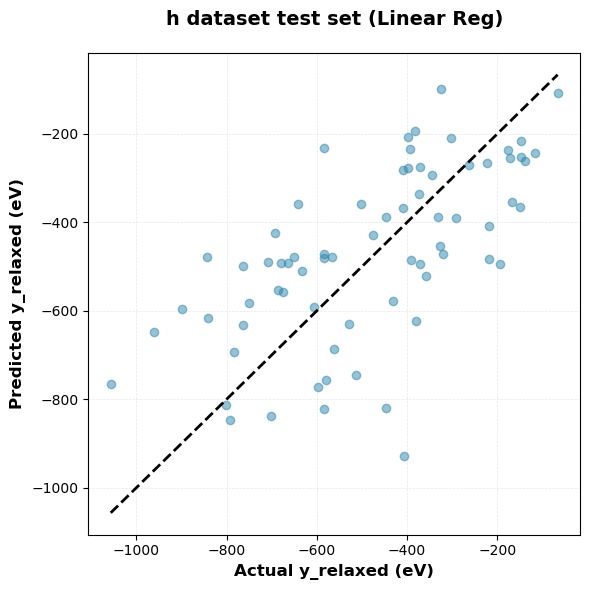

In [478]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


h_lr = LinearRegression()
h_lr.fit(h_X_train_scaled, h_y_train)
h_cv = cross_val_score(h_lr, h_X_train_scaled, h_y_train, cv=5, scoring='r2')
print("--- h dataset ---")
print(f"linear regression training R^2 (CV): {h_cv.mean():.3f}")
print(f"linear regression test R^2: {h_lr.score(h_X_test_scaled, h_y_test):.3f}")

def parity_plot(X, y, model, title):
    plt.figure(figsize=(6,6), dpi=100)
    plt.scatter(y, model.predict(X), alpha=0.5, color='#2E86AB')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual y_relaxed (eV)', fontsize=12, fontweight='bold')
    plt.ylabel('Predicted y_relaxed (eV)', fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

parity_plot(h_X_train_scaled, h_y_train, h_lr, "h dataset training set (Linear Reg)")
parity_plot(h_X_test_scaled, h_y_test, h_lr, "h dataset test set (Linear Reg)")

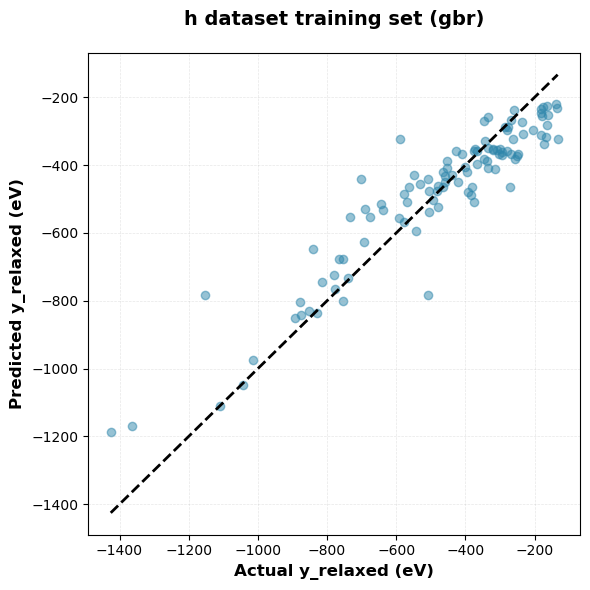

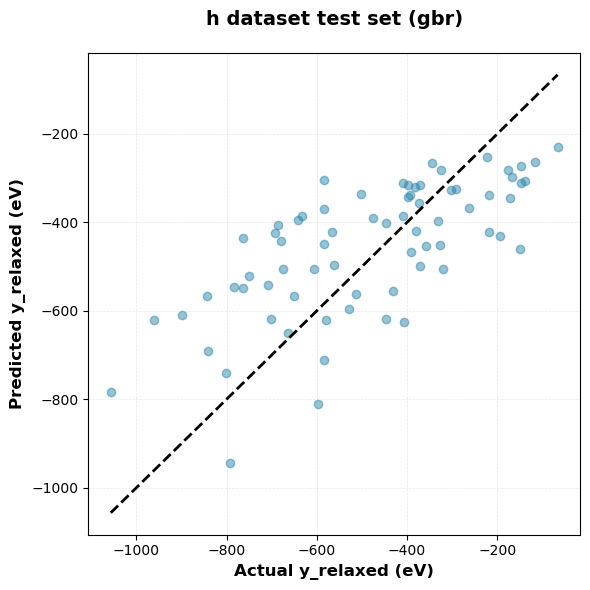

In [480]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

h_gbr = GradientBoostingRegressor(random_state = 1065)
# no_ads_gbr = GradientBoostingRegressor(random_state = 1065)

param_grid_basic = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

param_grid_comprehensive = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
    'loss': ['squared_error', 'absolute_error', 'huber']
}

def rand_search_cv(X, y, model, param_grid):
    rand_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=100,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=1065,
    )

    rand_search.fit(X, y)
    return rand_search

h_cv = rand_search_cv(X=h_X_train, y=h_y_train, model=h_gbr, param_grid=param_grid_basic)
h_best_gbr_model = h_cv.best_estimator_

parity_plot(h_X_train, h_y_train, h_best_gbr_model, "h dataset training set (gbr)")
parity_plot(h_X_test, h_y_test, h_best_gbr_model, "h dataset test set (gbr)")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


def eval_model(model, X_train, y_train, X_test, y_test, name="model"):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    rmse = root_mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # Parity plot
    plt.figure(figsize=(4,4))
    plt.scatter(y_test, pred, alpha=0.6)
    lims = [min(y_test.min(), pred.min()), max(y_test.max(), pred.max())]
    plt.plot(lims, lims, 'k--')
    plt.xlabel("True y")
    plt.ylabel("Predicted y")
    plt.title(f"Parity Plot: {name}")
    plt.tight_layout()
    plt.show()

In [491]:
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [492]:
cv = KFold(n_splits=5, shuffle=True, random_state=1065)

In [501]:
cat_model = CatBoostRegressor(
    loss_function="RMSE",
    verbose=False,
    random_seed=1065
)

cat_params = {
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.03, 0.1],
    "l2_leaf_reg": [1, 3, 5, 10],
    "iterations": [500, 1000],
    "bagging_temperature": [0, 1],
}

cat_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=cat_params,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

cat_search.fit(h_X_train, h_y_train)

print("\nBest CatBoost params:")
print(cat_search.best_params_)
print("Best CV RMSE:", -cat_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best CatBoost params:
{'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 6, 'bagging_temperature': 0}
Best CV RMSE: 212.54490727233025


In [494]:
xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=1065,
    tree_method="hist"
)

xgb_params = {
    "n_estimators": [300, 600, 900, 1200],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5, 6, 7],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "min_child_weight": [1, 3, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_params,
    n_iter=30,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

xgb_search.fit(h_X_train, h_y_train)

print("\nBest XGBoost params:")
print(xgb_search.best_params_)
print("Best CV RMSE:", -xgb_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best XGBoost params:
{'subsample': 0.6, 'n_estimators': 600, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best CV RMSE: 210.73323402016337


In [499]:
rf_model = RandomForestRegressor(random_state=1065)

rf_params = {
    "n_estimators": [300, 500, 800],
    "max_depth": [None, 10, 20, 40],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_params,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(h_X_train, h_y_train)

print("\nBest RF params:")
print(rf_search.best_params_)
print("Best CV RMSE:", -rf_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best RF params:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best CV RMSE: 207.26621728191043


In [496]:
svr_model = SVR()

svr_params = {
    "C": [0.1, 1, 3, 10, 30, 100],
    "gamma": ["scale", "auto", 0.1, 0.01, 0.001],
    "epsilon": [0.001, 0.01, 0.1, 1]
}

svr_search = GridSearchCV(
    estimator=svr_model,
    param_grid=svr_params,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

svr_search.fit(h_X_train_scaled, h_y_train)

print("\nBest SVR params:")
print(svr_search.best_params_)
print("Best CV RMSE:", -svr_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best SVR params:
{'C': 100, 'epsilon': 1, 'gamma': 0.01}
Best CV RMSE: 205.07437716032595



CatBoost
--------
MAE:  136.1527
RMSE: 160.9169
R²:   0.4994


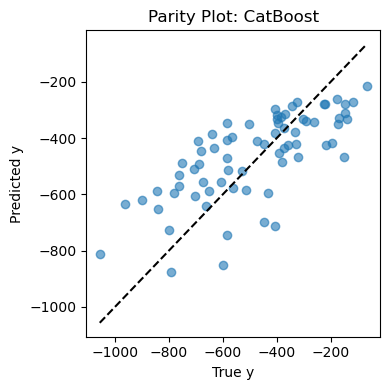


XGBoost
-------
MAE:  130.3277
RMSE: 157.6527
R²:   0.5195


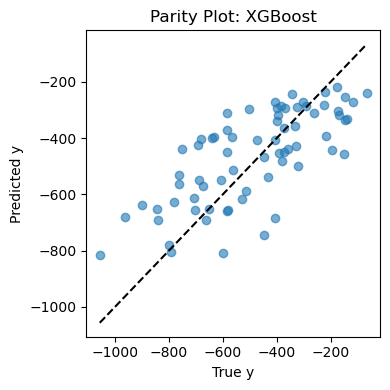


Random Forest
-------------
MAE:  134.9782
RMSE: 159.4493
R²:   0.5085


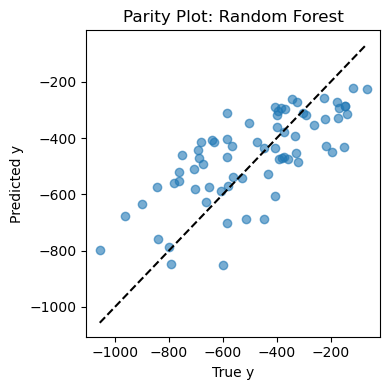


SVR (RBF)
---------
MAE:  144.4525
RMSE: 167.4830
R²:   0.4578


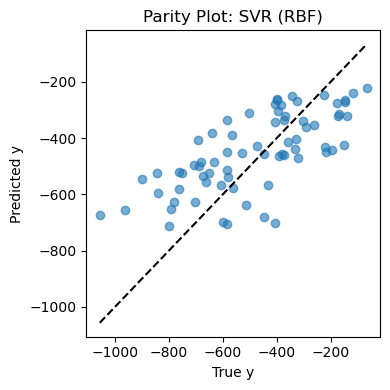

In [500]:
best_catboost = cat_search.best_estimator_
best_xgb = xgb_search.best_estimator_
best_rf = rf_search.best_estimator_
best_svr = svr_search.best_estimator_

eval_model(best_catboost, h_X_train, h_y_train, h_X_test, h_y_test, name="CatBoost")
eval_model(best_xgb, h_X_train, h_y_train, h_X_test, h_y_test, name="XGBoost")
eval_model(best_rf, h_X_train, h_y_train, h_X_test, h_y_test, name="Random Forest")
eval_model(best_svr, h_X_train_scaled, h_y_train, h_X_test_scaled, h_y_test, name="SVR (RBF)")